In [49]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime

#Dades de connexió

usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

#for taula in nombre_tablas:
#    query=f"select * from {taula}"
    
#    try:
#        df[taula] = pd.read_sql(query, cnx)
#        print(f"Taula '{taula}' carregada correctament.")
#    except Exception as e:
#        print(f"Error al carregar la taula '{taula}':{e}")
  
query="select * from BANK_marketing131024"
try:
        df["BANK_marketing131024"] = pd.read_sql(query, cnx)
        print(f"Taula 'BANK_marketing1310124' carregada correctament.")
except Exception as e:
        print("Error al carregar la taula BANK_marketing")

# Tancar la connexió
cnx.close()

conexió correcta
Taula 'BANK_marketing1310124' carregada correctament.


In [50]:
def ordenar_categoria_duration(valor):
     
     orden=0
     match valor:
         
        case "muy bajo":
            orden=1
        case "bajo":
            orden=2
        case "medio-bajo":
            orden=3
        case "medio-alto":
            orden=4
        case "alto":
            orden=5
        case "muy-alto":
            orden=6
        case "extremo-muy-alto":
            orden=7
        case _:
            orden=-1
     return orden
   

In [51]:
def cuartiles(df):
    #calcular cuartiles
    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.50)
    Q3 = df.quantile(0.75)

    #calcular IQR (rango intercuartílico)
    IQR = Q3 - Q1

    #calcular límite outliers
    min_Q = Q1 - 1.5*IQR
    max_Q = Q3 + 1.5*IQR

    min_Q_ext=Q1 - 3*IQR
    max_Q_ext=Q3 + 3*IQR
    
    return Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext

def clasificacion_duration(valor):
    
    if  valor < min_Q_ext:
        return "extremo-muy-bajo"
    elif valor < min_Q:
        return "muy bajo"
    elif valor < Q1:
        return "bajo"
    elif valor < Q2:
        return "medio-bajo"
    elif valor < Q3:
        return "medio-alto"
    elif valor < max_Q:
        return "alto"
    elif valor < max_Q_ext:
        return "muy-alto"
    else:
        return "extremo-muy-alto"

In [52]:
df_BANK_marketing=df['BANK_marketing131024']

In [53]:
df_BANK_marketing.head()


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1


In [54]:
df_BANK_marketing

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16158,21379,26,admin.,married,secondary,0,1595,0,0,cellular,15,jun,155,1,105,1,failure,1
16159,21380,37,admin.,married,secondary,0,1967,0,0,cellular,27,may,242,1,212,1,success,1
16160,21381,45,management,married,tertiary,0,81,0,1,cellular,30,jul,61,3,-1,0,unknown,0
16161,21382,44,services,single,secondary,0,618,0,0,cellular,12,may,193,1,-1,0,unknown,1


## 1. Dataset con limpieza de datos

Ya tenemos todos los datos limpios y esto se puede comprobar, ya que ya no tenemos null. En principio, no deberían haber outliers


In [55]:
df_BANK_marketing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16163 non-null  int64 
 1   age        16163 non-null  int64 
 2   job        16163 non-null  object
 3   marital    16163 non-null  object
 4   education  16163 non-null  object
 5   default    16163 non-null  int64 
 6   balance    16163 non-null  int64 
 7   housing    16163 non-null  int64 
 8   loan       16163 non-null  int64 
 9   contact    16163 non-null  object
 10  day        16163 non-null  int64 
 11  month      16163 non-null  object
 12  duration   16163 non-null  int64 
 13  campaign   16163 non-null  int64 
 14  pdays      16163 non-null  int64 
 15  previous   16163 non-null  int64 
 16  poutcome   16163 non-null  object
 17  deposit    16163 non-null  int64 
dtypes: int64(12), object(6)
memory usage: 2.2+ MB


In [56]:
df_BANK_marketing['job'].value_counts()

job
management       3727
blue-collar      2812
technician       2667
admin.           1907
services         1314
retired          1128
self-employed     599
student           518
unemployed        514
entrepreneur      472
housemaid         399
unknown           106
Name: count, dtype: int64

In [57]:
df_BANK_marketing['marital'].value_counts()

marital
married     9226
single      5065
divorced    1872
Name: count, dtype: int64

In [58]:
df_BANK_marketing['education'].value_counts()

education
secondary    7931
tertiary     5355
primary      2172
unknown       705
Name: count, dtype: int64

In [59]:
df_BANK_marketing['default'].value_counts()

default
0    15922
1      241
Name: count, dtype: int64

In [60]:
df_BANK_marketing['contact'].value_counts()

contact
cellular     11628
unknown       3388
telephone     1147
Name: count, dtype: int64

In [61]:
df_BANK_marketing['poutcome'].value_counts()

poutcome
unknown    12076
failure     1777
success     1527
other        783
Name: count, dtype: int64

## 2. Análisis exploratorio de datos (EDA)

In [62]:
df_BANK_vista_marketing=df_BANK_marketing[['id','contact','day','month','duration','campaign','pdays','previous','poutcome','deposit']]

In [63]:
df_BANK_vista_marketing['contact'].value_counts()

contact
cellular     11628
unknown       3388
telephone     1147
Name: count, dtype: int64

In [64]:
count_contact=df_BANK_vista_marketing["contact"].value_counts()
df_count_contact=pd.DataFrame(count_contact)
df_count_contact

,count
contact,
cellular,11628
unknown,3388
telephone,1147


Text(0.5, 1.0, 'Tipos de contacto última llamada')

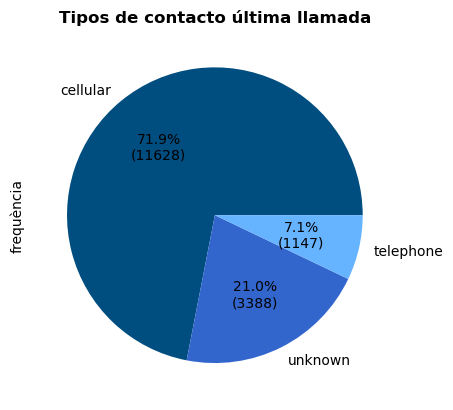

In [65]:
#funció per mostrar els valors i porcentatges del pie
def func(pct, allvalues):
    absolute = int(round(pct/100.*sum(allvalues)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

#Especifico una tonalitat de colors blaus per pintar el gràfic de sectors per estètica. De blau més fort a blau més clar
colors = ['#004d80','#3366cc','#66b3ff']


ax=df_count_contact["count"].plot.pie(autopct=lambda pct: func(pct, df_count_contact["count"]),colors=colors)

ax.set_ylabel("frequència")
ax.set_title("Tipos de contacto última llamada",fontweight='bold')

Vemos que tenemos un problema, en teoria el campo contact, solo puede valer telephone o cellular, primero porque lo dice la fuente oficial de la página web de Bank_marketing, y en segundo lugar porque en cada registro existe una duración de llamada, **pero tenemos 2346, un 21% de registros "unknown"**.

Como tendremos que calcular la tasa de conversión del Dataset, y emplearemos rangos de duración para calcularla, de momento, no hacemos ningún tratamiento para intentar clasificar los unknown a otra etiqueta, que en principio sería cellular y telephone.

In [66]:
#Per poder analitzar la segona pregunta de l'exercici
#filtro_cellular=df_BANK_vista_marketing['contact']=='telephone'
#df_BANK_vista_marketing=df_BANK_vista_marketing[filtro_cellular]

df_BANK_vista_marketing.describe()

,id,day,duration,campaign,pdays,previous,deposit
count,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000
mean,9696.799233,15.647157,372.542288,2.508816,51.326734,0.824909,0.473860
std,6754.310906,8.417469,345.261981,2.751196,109.031324,2.241574,0.499332
min,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,4041.500000,8.000000,139.000000,1.000000,-1.000000,0.000000,0.000000
50%,8082.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,17342.500000,22.000000,498.000000,3.000000,10.000000,1.000000,1.000000
max,21383.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [67]:
Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext = cuartiles(df_BANK_vista_marketing['duration'])
df_BANK_vista_marketing["categoria_duration"] = df_BANK_vista_marketing["duration"].apply(clasificacion_duration)

C:\Users\gorka\AppData\Local\Temp\ipykernel_20548\1569162738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_marketing["categoria_duration"] = df_BANK_vista_marketing["duration"].apply(clasificacion_duration)


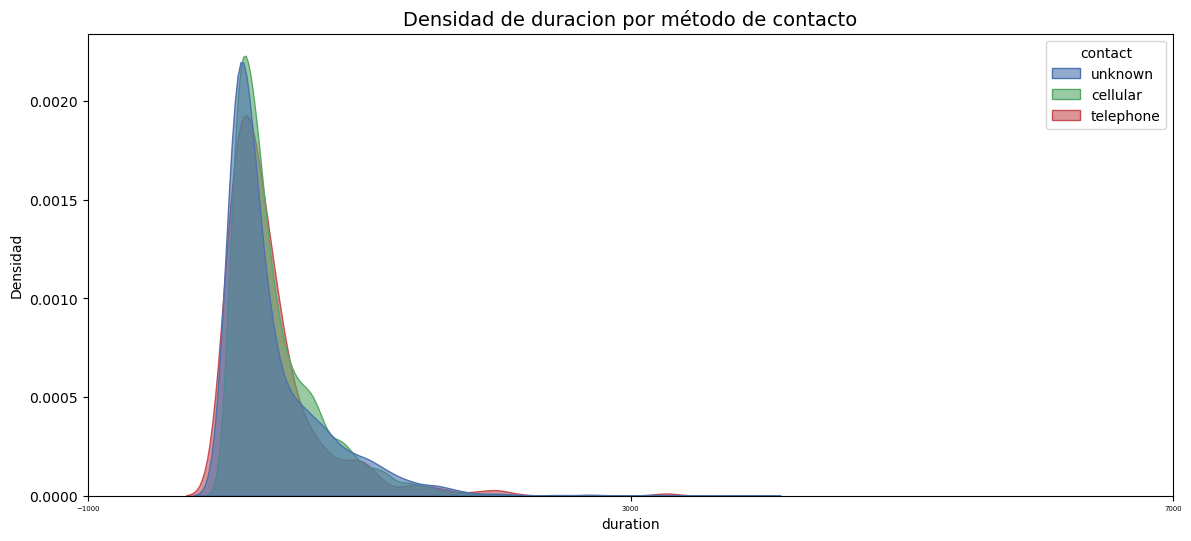

In [68]:
plt.figure(figsize=(14, 6))

sns.kdeplot(data=df_BANK_vista_marketing, x='duration', hue='contact', fill=True, common_norm=False, alpha=0.6)

plt.title('Densidad de duracion por método de contacto', fontsize=14)
plt.xlabel('duration')
plt.ylabel('Densidad')

plt.xticks(range(-1000,10000,4000), fontsize=5)

plt.show()

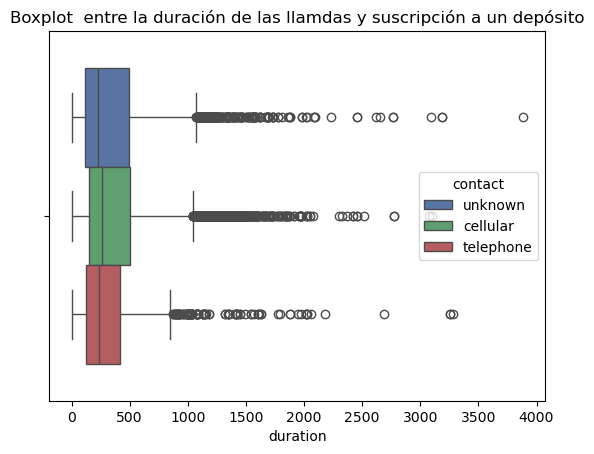

In [69]:
# Crear un boxplot per veure la distribució de la durada segons si s'ha subscrit al dipòsit
custom_palette = ['skyblue', 'salmon']
sns.boxplot(x='duration',data=df_BANK_vista_marketing, hue='contact')
plt.title('Boxplot  entre la duración de las llamdas y suscripción a un depósito')
plt.show()

## 3. Calcular tasa de conversión por categorías de grupos y tipos de contacto

Quiero trocear el segmento duración en trocitos más pequeños, pero para eso quiero ver los estadísticos princiaples

In [70]:
df_BANK_vista_marketing['duration'].describe()

count    16163.000000
mean       372.542288
std        345.261981
min          2.000000
25%        139.000000
50%        255.000000
75%        498.000000
max       3881.000000
Name: duration, dtype: float64

In [71]:
positive_infinity = float('inf')
df_BANK_vista_marketing['rango_duracion'] = pd.cut(df_BANK_vista_marketing['duration'], bins=[0, Q1, Q2, Q3, max_Q, max_Q_ext, positive_infinity])
df_BANK_vista_marketing

C:\Users\gorka\AppData\Local\Temp\ipykernel_20548\2879743195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_marketing['rango_duracion'] = pd.cut(df_BANK_vista_marketing['duration'], bins=[0, Q1, Q2, Q3, max_Q, max_Q_ext, positive_infinity])


,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,categoria_duration,rango_duracion
0,1,unknown,5,may,1042,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
1,2,unknown,5,may,1042,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
2,3,unknown,5,may,1467,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
3,4,unknown,5,may,1389,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
4,5,unknown,5,may,579,1,-1,0,unknown,1,alto,"(498.0, 1036.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...
16158,21379,cellular,15,jun,155,1,105,1,failure,1,medio-bajo,"(139.0, 255.0]"
16159,21380,cellular,27,may,242,1,212,1,success,1,medio-bajo,"(139.0, 255.0]"
16160,21381,cellular,30,jul,61,3,-1,0,unknown,0,bajo,"(0.0, 139.0]"
16161,21382,cellular,12,may,193,1,-1,0,unknown,1,medio-bajo,"(139.0, 255.0]"


Quiero agrupar las etiquetas de range_duration y sumar los 1 de cada rango de los depósitos y los registros por depósito

In [72]:
df_BANK_vista_marketing

,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,categoria_duration,rango_duracion
0,1,unknown,5,may,1042,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
1,2,unknown,5,may,1042,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
2,3,unknown,5,may,1467,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
3,4,unknown,5,may,1389,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
4,5,unknown,5,may,579,1,-1,0,unknown,1,alto,"(498.0, 1036.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...
16158,21379,cellular,15,jun,155,1,105,1,failure,1,medio-bajo,"(139.0, 255.0]"
16159,21380,cellular,27,may,242,1,212,1,success,1,medio-bajo,"(139.0, 255.0]"
16160,21381,cellular,30,jul,61,3,-1,0,unknown,0,bajo,"(0.0, 139.0]"
16161,21382,cellular,12,may,193,1,-1,0,unknown,1,medio-bajo,"(139.0, 255.0]"


In [73]:
filtre_cellular=df_BANK_vista_marketing['contact']=="cellular"
df_BANK_vista_marketing[filtre_cellular]

,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,categoria_duration,rango_duracion
368,369,cellular,4,jul,1044,3,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
369,370,cellular,7,jul,494,4,-1,0,unknown,1,medio-alto,"(255.0, 498.0]"
370,371,cellular,7,jul,615,2,-1,0,unknown,1,alto,"(498.0, 1036.5]"
371,372,cellular,7,jul,718,2,-1,0,unknown,1,alto,"(498.0, 1036.5]"
372,373,cellular,7,jul,434,3,-1,0,unknown,1,medio-alto,"(255.0, 498.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
16158,21379,cellular,15,jun,155,1,105,1,failure,1,medio-bajo,"(139.0, 255.0]"
16159,21380,cellular,27,may,242,1,212,1,success,1,medio-bajo,"(139.0, 255.0]"
16160,21381,cellular,30,jul,61,3,-1,0,unknown,0,bajo,"(0.0, 139.0]"
16161,21382,cellular,12,may,193,1,-1,0,unknown,1,medio-bajo,"(139.0, 255.0]"


In [74]:
df_BANK_vista_marketing[filtre_cellular].describe()

,id,day,duration,campaign,pdays,previous,deposit
count,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000
mean,9468.193584,15.598813,376.535346,2.389233,65.390523,1.037754,0.542570
std,6848.454807,8.384701,329.277265,2.407707,117.956673,2.423482,0.498206
min,369.000000,1.000000,6.000000,1.000000,-1.000000,0.000000,0.000000
25%,3587.750000,8.000000,149.000000,1.000000,-1.000000,0.000000,0.000000
50%,7569.000000,15.000000,266.000000,2.000000,-1.000000,0.000000,1.000000
75%,17329.250000,22.000000,507.000000,3.000000,96.000000,1.000000,1.000000
max,21383.000000,31.000000,3102.000000,43.000000,854.000000,58.000000,1.000000


In [75]:
filtre_telephone=df_BANK_vista_marketing['contact']=="telephone"
df_BANK_vista_marketing[filtre_telephone].describe()

,id,day,duration,campaign,pdays,previous,deposit
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,9853.324324,15.942459,349.574542,2.958152,52.672188,1.006103,0.503923
std,6820.479196,8.852988,379.428143,3.173020,106.498100,2.689414,0.500203
min,487.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,3724.500000,8.500000,125.000000,1.000000,-1.000000,0.000000,0.000000
50%,8113.000000,15.000000,236.000000,2.000000,-1.000000,0.000000,1.000000
75%,17444.000000,23.000000,414.000000,4.000000,70.000000,1.000000,1.000000
max,21342.000000,31.000000,3284.000000,43.000000,690.000000,37.000000,1.000000


In [76]:
filtre_unknown=df_BANK_vista_marketing['contact']=="unknown"
df_BANK_vista_marketing[filtre_unknown].describe()

,id,day,duration,campaign,pdays,previous,deposit
count,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000
mean,10428.408501,15.713105,366.613341,2.767119,2.602715,0.033058,0.227863
std,6342.276517,8.378469,384.244706,3.553433,45.502383,0.757269,0.419516
min,1.000000,1.000000,3.000000,1.000000,-1.000000,0.000000,0.000000
25%,6341.250000,8.000000,115.000000,1.000000,-1.000000,0.000000,0.000000
50%,9066.500000,16.000000,226.000000,2.000000,-1.000000,0.000000,0.000000
75%,17362.000000,21.000000,496.500000,3.000000,-1.000000,0.000000,0.000000
max,21377.000000,31.000000,3881.000000,63.000000,782.000000,41.000000,1.000000


In [77]:
df_BANK_vista_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  16163 non-null  int64   
 1   contact             16163 non-null  object  
 2   day                 16163 non-null  int64   
 3   month               16163 non-null  object  
 4   duration            16163 non-null  int64   
 5   campaign            16163 non-null  int64   
 6   pdays               16163 non-null  int64   
 7   previous            16163 non-null  int64   
 8   poutcome            16163 non-null  object  
 9   deposit             16163 non-null  int64   
 10  categoria_duration  16163 non-null  object  
 11  rango_duracion      16163 non-null  category
dtypes: category(1), int64(7), object(4)
memory usage: 1.4+ MB


In [78]:
#Si comento las dos primeras líneas puedo calcularlo sin quitar anomalías y si no las comento entonces sí lo calcularía quitando anomalías

filtro_quitando_outliers=(df_BANK_vista_marketing['categoria_duration']!="muy-alto") & (df_BANK_vista_marketing['categoria_duration']!="extremo-muy-alto")

df_BANK_vista_marketing=df_BANK_vista_marketing[filtro_quitando_outliers]

df_marketing_group_by_categ_durat_contact = df_BANK_vista_marketing.groupby(["contact"])["deposit"].agg(['mean','count'])
columns={'mean':'tasa_de_conversión','count':'total_registros'}
df_marketing_group_by_categ_durat_contact.rename(columns={'mean':'tasa_conversion','count':'total_registros'},inplace=True)
df_marketing_group_by_categ_durat_contact

,tasa_conversion,total_registros
contact,,
cellular,0.522166,11008
telephone,0.483456,1088
unknown,0.177629,3147


In [79]:
df_marketing_group_by_categ_durat_contact=df_marketing_group_by_categ_durat_contact.reset_index()
df_marketing_group_by_categ_durat_contact

,contact,tasa_conversion,total_registros
0,cellular,0.522166,11008
1,telephone,0.483456,1088
2,unknown,0.177629,3147


C:\Users\gorka\AppData\Local\Temp\ipykernel_20548\522027076.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Móvil', 'Telefóno','Desconocidos'])


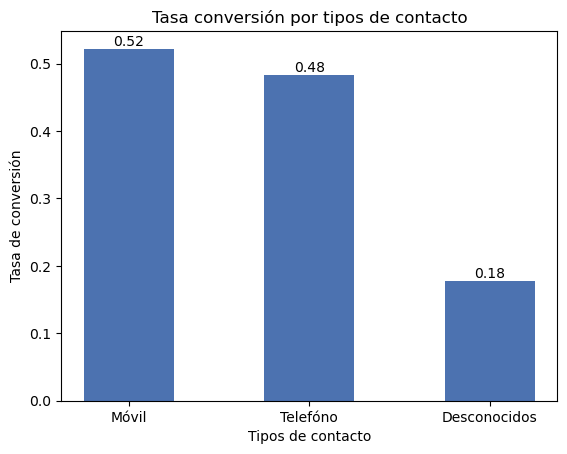

In [80]:
plt.style.use("seaborn-v0_8-deep")
fig, ax = plt.subplots()
bars=ax.bar(df_marketing_group_by_categ_durat_contact['contact'], df_marketing_group_by_categ_durat_contact['tasa_conversion'],width=0.5)
# Añadir títulos y etiquetas
#plt.xticks(rotation=90,fontsize=10)
plt.title("Tasa conversión por tipos de contacto")
plt.xlabel("Tipos de contacto")
plt.ylabel("Tasa de conversión")
ax.set_xticklabels(['Móvil', 'Telefóno','Desconocidos'])

# Añadir los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

# Mostrar gráfico
plt.show()

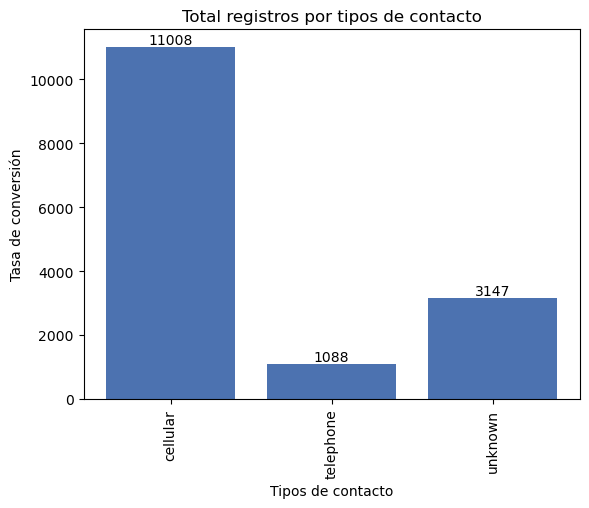

In [81]:
fig, ax = plt.subplots()
bars=ax.bar(df_marketing_group_by_categ_durat_contact['contact'], df_marketing_group_by_categ_durat_contact['total_registros'])
# Añadir títulos y etiquetas
plt.xticks(rotation=90,fontsize=10)
plt.title("Total registros por tipos de contacto")
plt.xlabel("Tipos de contacto")
plt.ylabel("Tasa de conversión")

# Añadir los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.0f}", ha='center', va='bottom')

# Mostrar gráfico
plt.show()

El peso de estas categorías en cuánto a registros las podemos calcular tal como sigue, para **medio-alto** son 2797 registros que supone el 25% y el 19,3% para alto.

In [82]:
total_registros=df_BANK_vista_marketing.shape[0]

df_marketing_group_by_categ_durat_contact['total_registros'].sum()
por_medio_alto=df_marketing_group_by_categ_durat_contact['total_registros'].sum()/total_registros
por_medio_alto


1.0

## 4. ¿Es estadísticamente significativo que las tasas de conversión de telefónica són superiores a las tasas de conversión para móviles?

Podremos utilizar la **prueba de proporciones (Z-Test)** que es una herramienta estadística utilizada para comparar dos proporciones o tasas de conversion y determinar si la diferencia es estadísticamente significativa entre ellas. La proporción, es decir la tasa de conversión, como en realidad es como si fuera una media, es un estadística que tendrá una distribución normal por el teorema central del límite. Esta asumpción es importante, pues sinó no podríamos aplicar el Z-test

### 4.1 Determinar si la proporcion de cada muestra tiene un tamaño razonable para aplicar Z-test

Se debe cumplir n x p>5 y n x (1-p) > 5, donde n es el tamaño de la muestra y p es la proporcion de éxitos.



**Categoría medio-alto**

In [83]:
df_marketing_group_by_categ_durat_contact

,contact,tasa_conversion,total_registros
0,cellular,0.522166,11008
1,telephone,0.483456,1088
2,unknown,0.177629,3147


In [84]:
#df_marketing_group_by_categ_durat_contact['total_registros']=df_marketing_group_by_categ_durat_contact['total_registros'].astype('np.float')
df_marketing_group_by_categ_durat_contact

,contact,tasa_conversion,total_registros
0,cellular,0.522166,11008
1,telephone,0.483456,1088
2,unknown,0.177629,3147


In [85]:
n_cellular=df_marketing_group_by_categ_durat_contact.iloc[0,2]
n_cellular
#n_cellular=float(n_cellular)
n_cellular


11008

In [86]:
p_cellular=df_marketing_group_by_categ_durat_contact.iloc[0,1]
#p_cellular=float(p_cellular)
p_cellular

0.5221656976744186

In [87]:
n_cellular*p_cellular

5747.999999999999

In [88]:
tamaño_muestra_razonable_grupo_cellular=((n_cellular*p_cellular)>5) and ((n_cellular*(1-p_cellular))>5)
tamaño_muestra_razonable_grupo_cellular

True

In [89]:
n_telephone=df_marketing_group_by_categ_durat_contact.iloc[1,2]
n_telephone

1088

In [90]:
p_telephone=df_marketing_group_by_categ_durat_contact.iloc[1,1]
p_telephone

0.4834558823529412

In [91]:
tamaño_muestra_razonable_grupo_telephone=((n_telephone*p_telephone)>5) and (n_telephone*(1-p_telephone)>5)
tamaño_muestra_razonable_grupo_telephone

True

**1. Cálculo de proporción combinada**

In [92]:
pcombinada=(p_cellular*n_cellular+p_telephone*n_telephone)/(n_cellular+n_telephone)
pcombinada

0.5186838624338623

**2. Cálculo varianza de la diferencia de las proporciones**


In [93]:
Varianza_dif_proporciones=pcombinada*(1-pcombinada)*((1/n_cellular)+(1/n_telephone))
Varianza_dif_proporciones

0.00025213760372552805

**3. Cálculo de Z**

**Tanto quitando outliers como no quitándolos, podemos concluir que SÍ hay diferencias estadísticamente significativas entre llamar por teléfono y llamar vía móvil**, ya que el valor de Z nos da siempre por encima de 1,96, con un pvalor=0,05

In [94]:
Z=(p_cellular-p_telephone)/np.sqrt(Varianza_dif_proporciones)
Z

2.437823666302703